In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
raw_data = pd.read_csv('housing.csv',header=0 )

In [3]:
raw_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
raw_data.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
raw_data.shape

(20640, 10)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
raw_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
# Add nulls to a column
#null_indices = np.random.choice(raw_data.index, size=int(0.1 * len(raw_data)), replace=False)
#raw_data.loc[null_indices, ['housing_median_age','total_bedrooms','households','population']] = np.nan


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


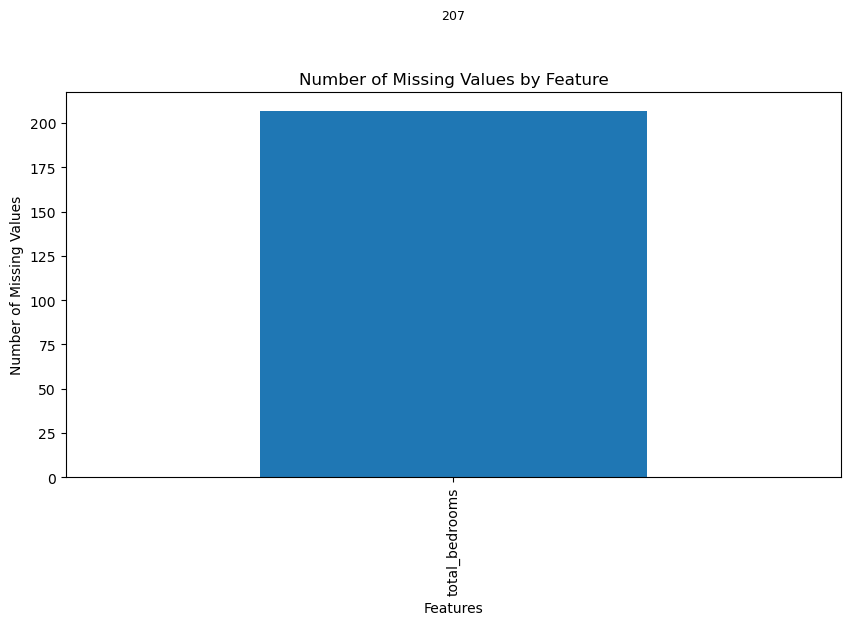

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming raw_data is your DataFrame
missing_data = raw_data.isnull().sum()
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(10,5))
missing_data.plot(kind='bar')

for i, v in enumerate(missing_data):
    plt.text(i, v + 50, int(v), ha='center', va='bottom', fontsize=9)

plt.title('Number of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()


In [11]:
imputer = SimpleImputer(strategy='median')
columns_to_impute = ['housing_median_age', 'total_bedrooms', 'households', 'population']
raw_data[columns_to_impute] = imputer.fit_transform(raw_data[columns_to_impute])



In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


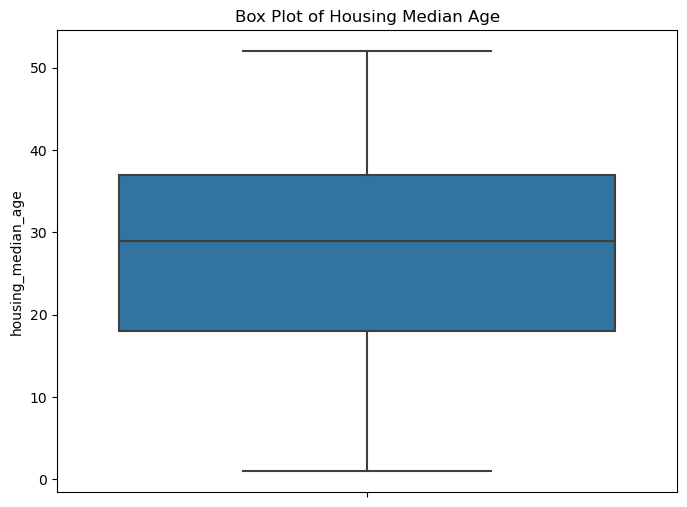

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=raw_data['housing_median_age'])
plt.title('Box Plot of Housing Median Age')
plt.show()



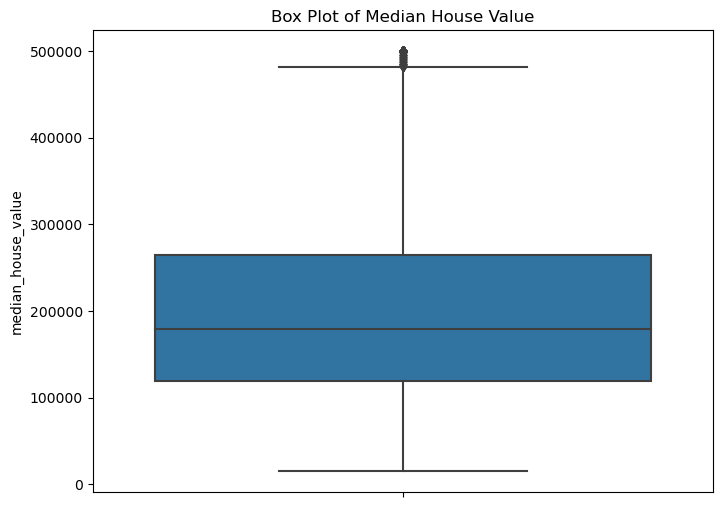

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=raw_data['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.show()




In [15]:
raw_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
raw_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
raw_data[raw_data['ocean_proximity']=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [18]:
raw_data[['population','median_income']][raw_data['ocean_proximity']=='ISLAND']

,population,median_income
8314,744.0,2.1579
8315,1100.0,2.8333
8316,733.0,3.3906
8317,341.0,2.7361
8318,422.0,2.6042


In [19]:
raw_data[['population','median_income']][raw_data['ocean_proximity']=='ISLAND']

,population,median_income
8314,744.0,2.1579
8315,1100.0,2.8333
8316,733.0,3.3906
8317,341.0,2.7361
8318,422.0,2.6042


In [20]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


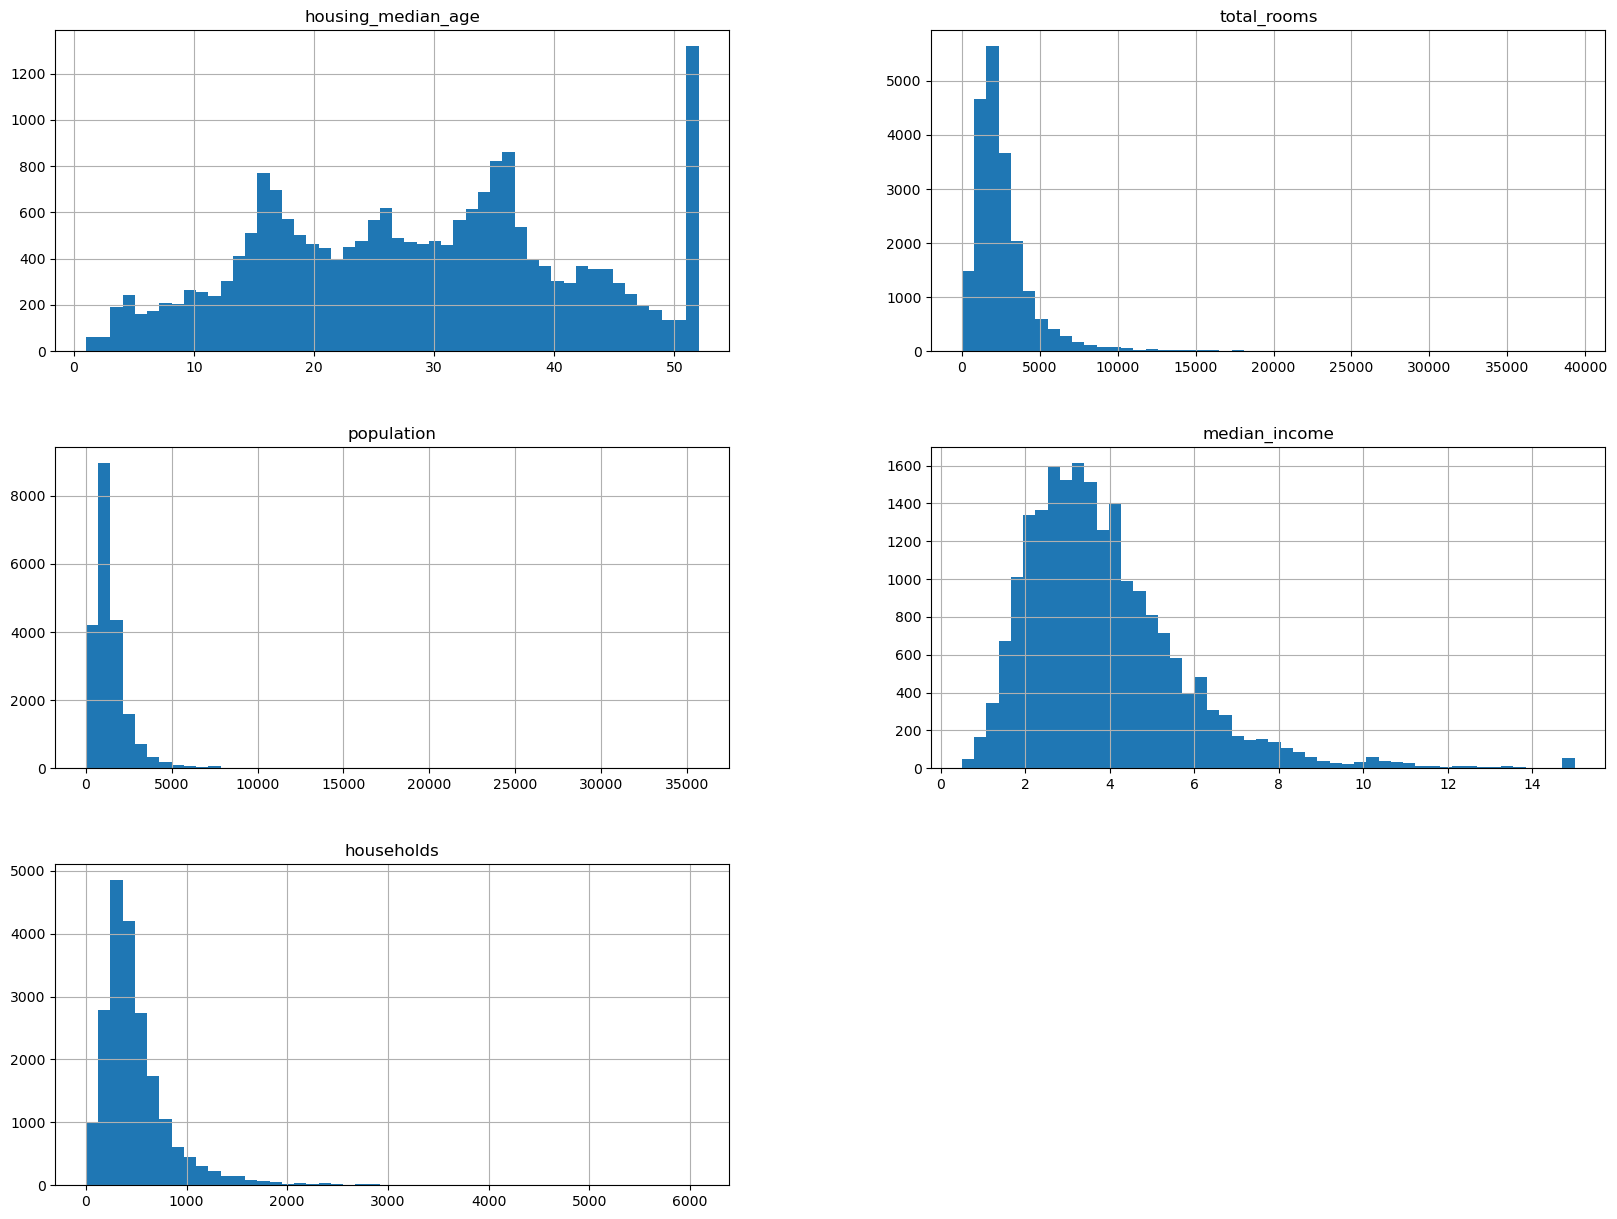

In [21]:
raw_data[['housing_median_age','total_rooms','population','median_income','households']].hist(bins=50 , figsize= (20,15))
plt.show()

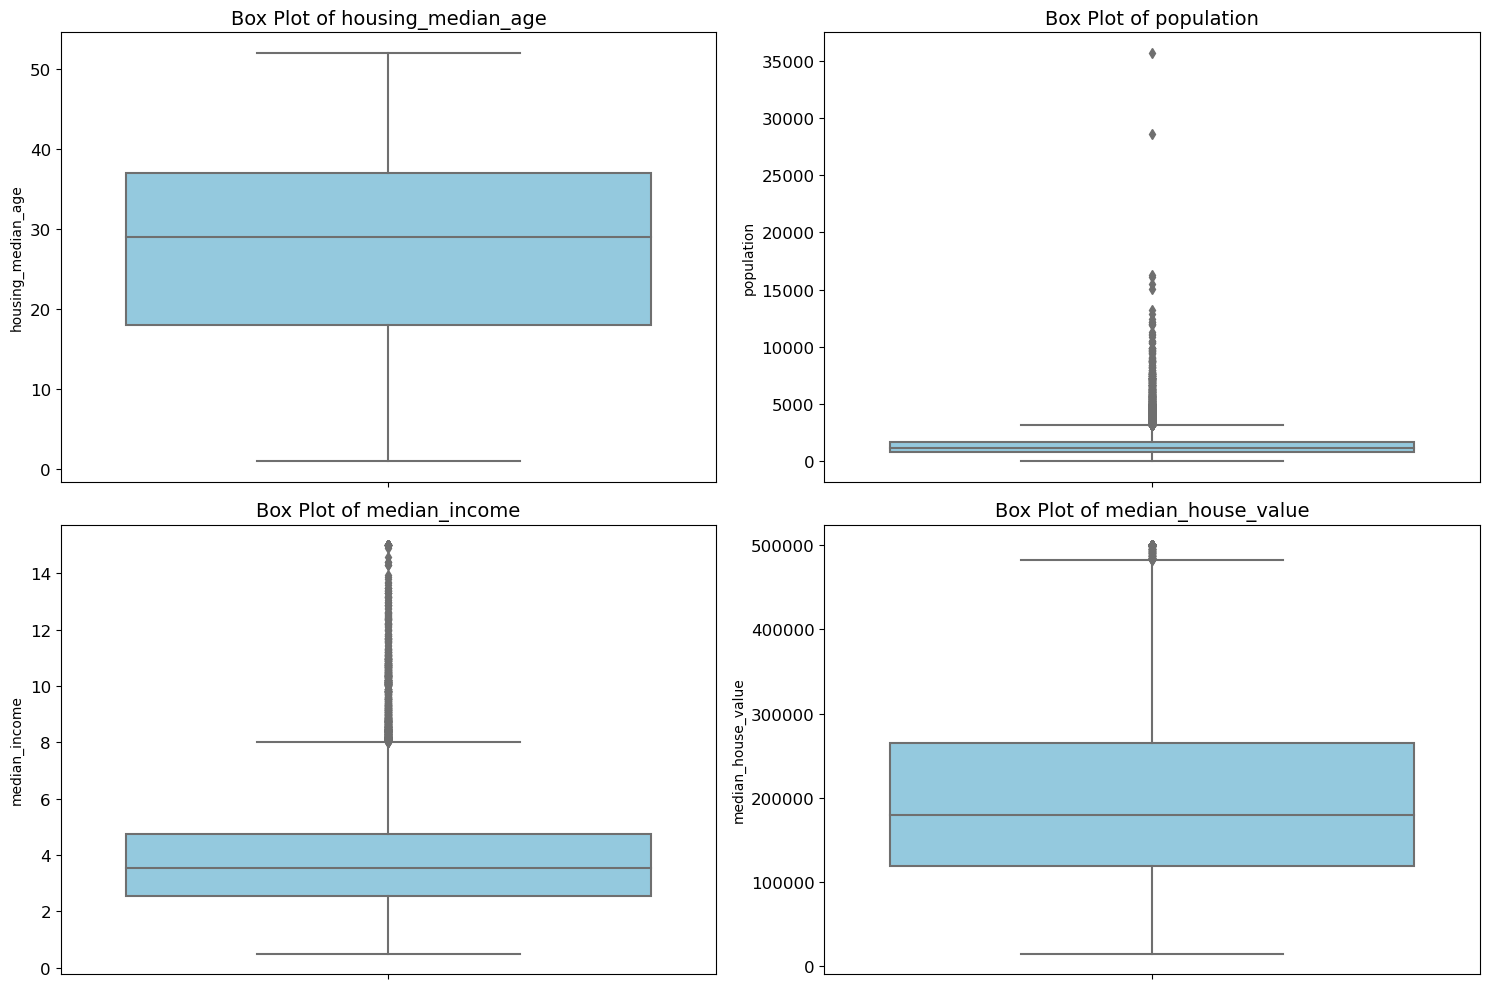

In [22]:


# List of columns you're interested in
columns = ['housing_median_age', 'population', 'median_income', 'median_house_value']

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for ax, column in zip(axes.flat, columns):
    sns.boxplot(y=raw_data[column], color="skyblue", ax=ax)
    ax.set_title(f'Box Plot of {column}', fontsize=14)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


In [23]:
for column in columns:
    lower_threshold = raw_data[column].quantile(0.04)
    upper_threshold = raw_data[column].quantile(0.96)
    raw_data = raw_data[(raw_data[column] > lower_threshold) 
                        & (raw_data[column] < upper_threshold)]
raw_data.shape

(14374, 10)

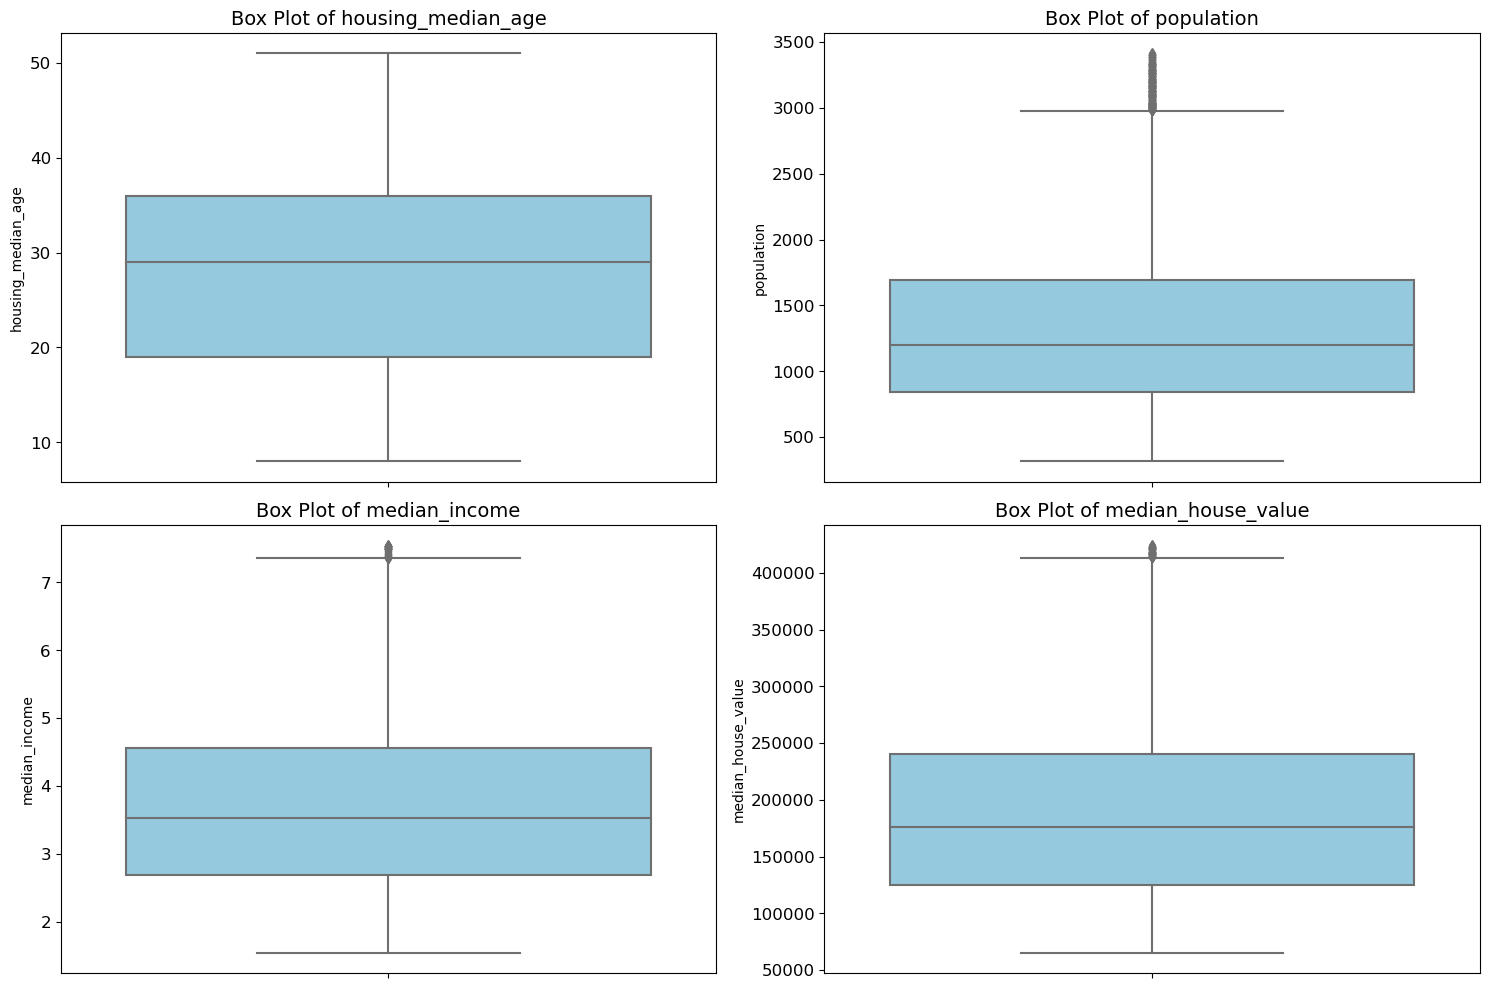

In [24]:
columns = ['housing_median_age', 'population', 'median_income', 'median_house_value']

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for ax, column in zip(axes.flat, columns):
    sns.boxplot(y=raw_data[column], color="skyblue", ax=ax)
    ax.set_title(f'Box Plot of {column}', fontsize=14)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

In [25]:
raw_data.shape

(14374, 10)

In [26]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14374 entries, 8 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14374 non-null  float64
 1   latitude            14374 non-null  float64
 2   housing_median_age  14374 non-null  float64
 3   total_rooms         14374 non-null  float64
 4   total_bedrooms      14374 non-null  float64
 5   population          14374 non-null  float64
 6   households          14374 non-null  float64
 7   median_income       14374 non-null  float64
 8   median_house_value  14374 non-null  float64
 9   ocean_proximity     14374 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [27]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
raw_data['total_bedrooms'] = imputer.fit_transform(raw_data[['total_bedrooms']])


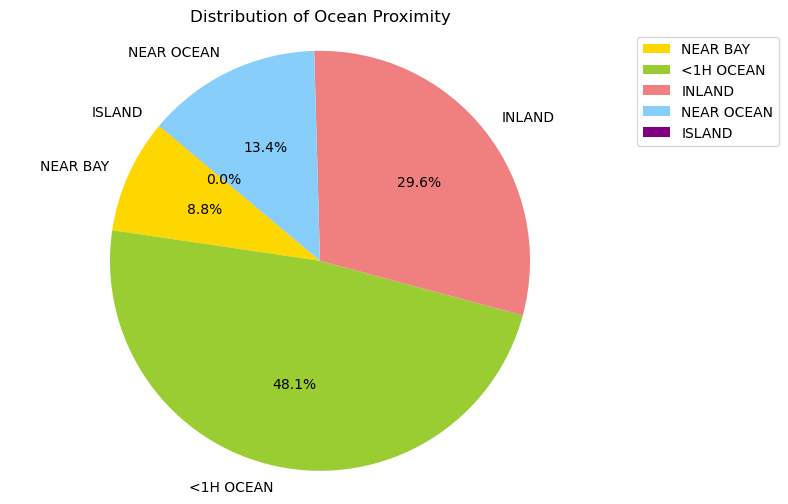

In [28]:
# Count the frequency of each category
data_counter = Counter(raw_data['ocean_proximity'])

# Separate the keys and values into two lists
labels = list(data_counter.keys())
sizes = list(data_counter.values())

# Specify a color palette
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a legend and a title
plt.legend(labels, loc="upper left", bbox_to_anchor=(1,1))  # Adjust the position of the legend
plt.title('Distribution of Ocean Proximity')

plt.show()



In [29]:
raw_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,NEAR BAY
25,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [30]:
# Perform one-hot encoding on 'ocean_proximity'
encoded_data = pd.get_dummies(raw_data, columns=['ocean_proximity'])



In [31]:
encoded_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,False,False,False,True,False
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,False,False,False,True,False
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,False,False,False,True,False
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,False,False,False,True,False
25,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,107500.0,False,False,False,True,False


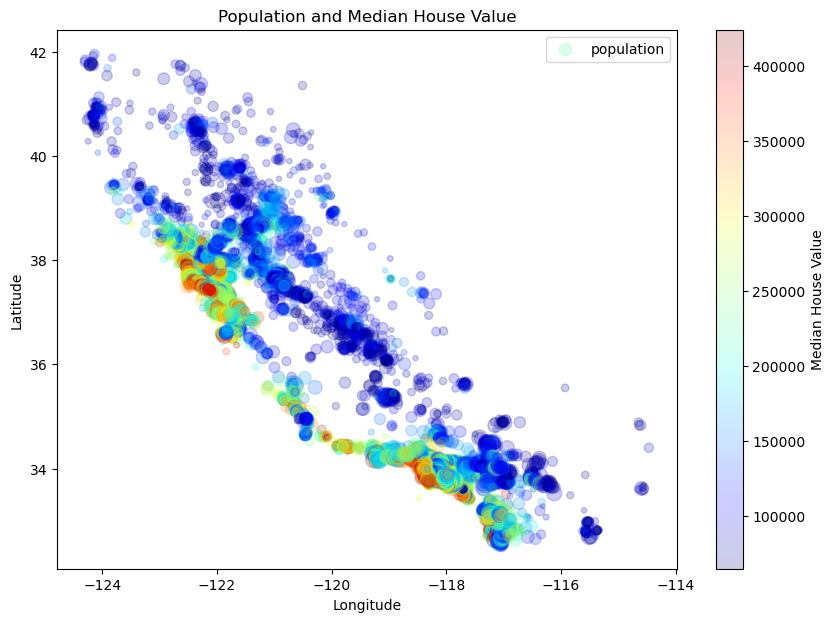

In [32]:
# Create a scatter plot
plt.figure(figsize=(10,7))
scatter = plt.scatter(raw_data['longitude'], raw_data['latitude'], 
                      s=raw_data['population']/25, label='population', 
                      c=raw_data['median_house_value'], cmap=plt.get_cmap("jet"), 
                      alpha=0.2)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value')

# Improve the clarity of the labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Population and Median House Value')
plt.legend()

plt.show()


In [33]:
correlation_matrix= raw_data.drop('ocean_proximity',axis=1).corr()
print(correlation_matrix["median_house_value"].sort_values
      (ascending=False))


median_house_value    1.000000
median_income         0.607527
total_rooms           0.158119
households            0.110814
total_bedrooms        0.079580
housing_median_age    0.058736
population           -0.006181
longitude            -0.035099
latitude             -0.152928
Name: median_house_value, dtype: float64


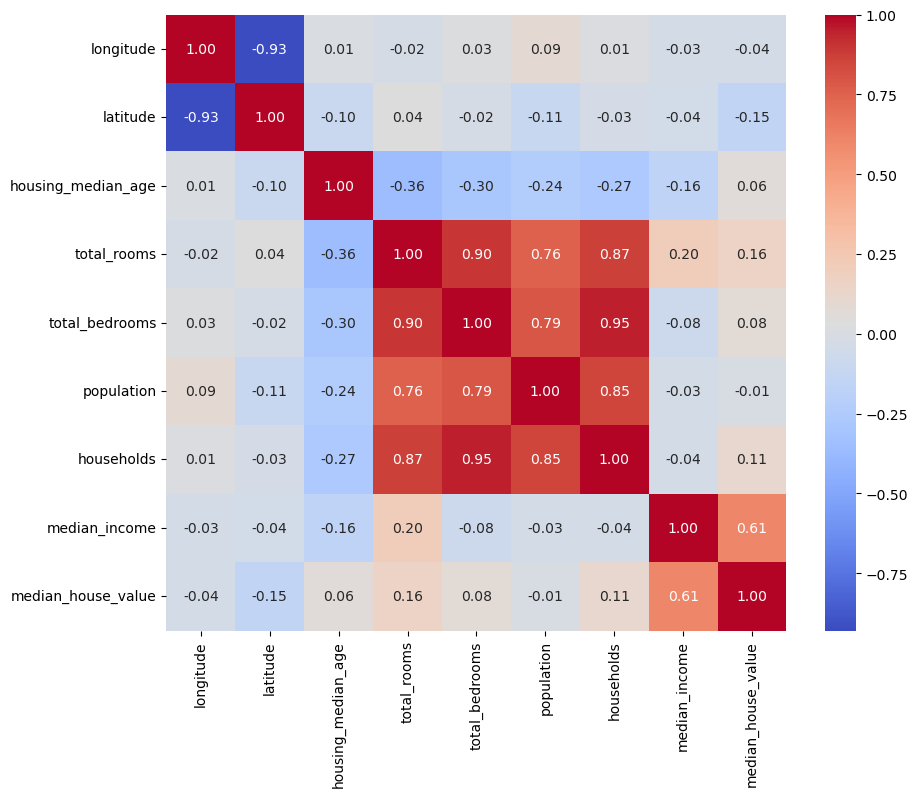

In [34]:
# Calculate the correlation matrix
correlation_matrix = raw_data.drop('ocean_proximity',axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()


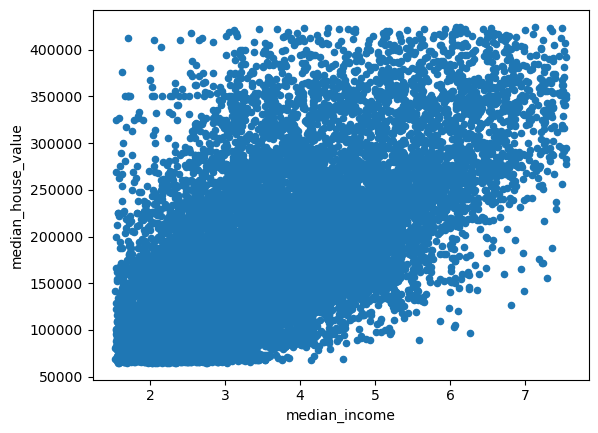

In [35]:
raw_data.plot(kind = "scatter" , x ='median_income' , y = 'median_house_value' )
plt.show()

In [36]:
raw_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [37]:
raw_data['total_rooms_per_population']= raw_data['total_rooms']/raw_data['population']
raw_data['median_income_per_population']=raw_data['median_income']/raw_data['population']

In [38]:
data = raw_data.copy()

In [39]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_rooms_per_population',
       'median_income_per_population'],
      dtype='object')

In [40]:
print(correlation_matrix["median_house_value"].sort_values(ascending=False))


median_house_value    1.000000
median_income         0.607527
total_rooms           0.158119
households            0.110814
total_bedrooms        0.079580
housing_median_age    0.058736
population           -0.006181
longitude            -0.035099
latitude             -0.152928
Name: median_house_value, dtype: float64


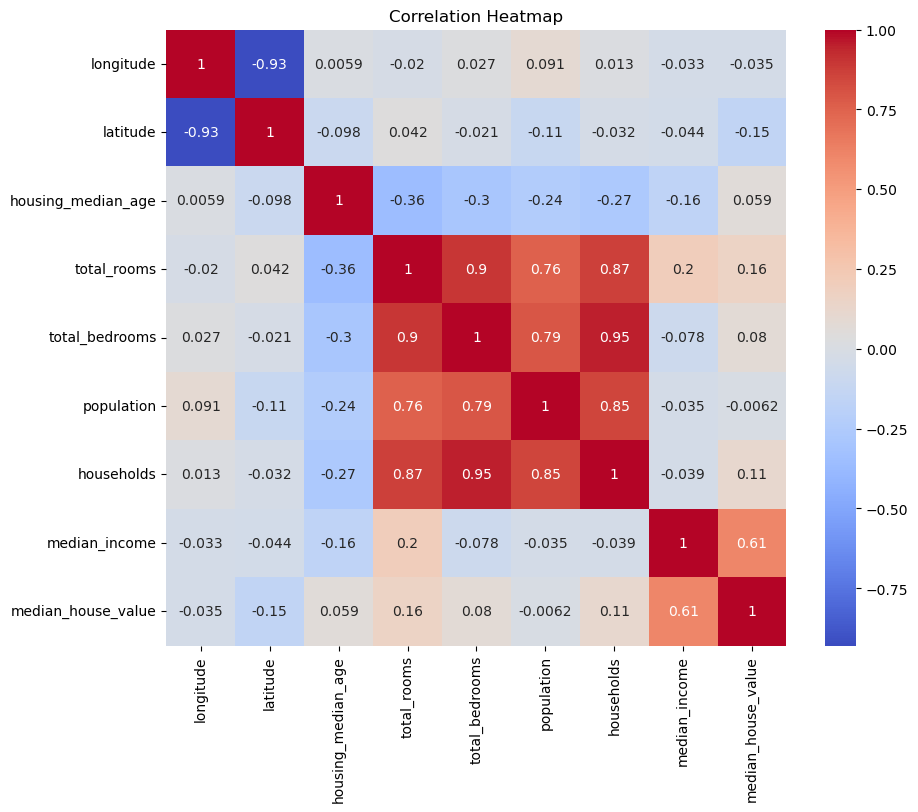

In [41]:

# Assuming 'data' is your DataFrame and 'correlation_matrix' is your correlation matrix

plt.figure(figsize=(10,8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Create a heatmap
plt.title('Correlation Heatmap')
plt.show()

In [42]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_rooms_per_population',
       'median_income_per_population'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# List of columns to standardize (excluding one-hot encoded and target variable)
cols_to_standardize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',
                       'total_rooms_per_population', 'median_income_per_population']

# Standardize the columns
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_population,median_income_per_population
8,-1.399183,1.080154,1.296295,0.100434,0.607538,-0.195732,0.523952,-1.251146,226700.0,NEAR BAY,0.322468,-0.769876
15,-1.399183,1.084836,2.054371,-1.001881,-0.797488,-0.976223,-0.837991,-1.216847,140000.0,NEAR BAY,-0.414716,-0.216370
18,-1.399183,1.080154,2.054371,-0.142306,-0.164858,-0.526942,-0.200223,-1.319821,158700.0,NEAR BAY,0.528548,-0.650217
21,-1.404238,1.084836,1.296295,-0.603204,-0.488529,-0.620479,-0.418299,-1.533306,159800.0,NEAR BAY,-0.187985,-0.719944
25,-1.409292,1.084836,1.201536,-1.451257,-1.385981,-1.558909,-1.434612,-1.002440,107500.0,NEAR BAY,-0.298293,1.679545


In [44]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_rooms_per_population',
       'median_income_per_population'],
      dtype='object')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14374 entries, 8 to 20639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     14374 non-null  float64
 1   latitude                      14374 non-null  float64
 2   housing_median_age            14374 non-null  float64
 3   total_rooms                   14374 non-null  float64
 4   total_bedrooms                14374 non-null  float64
 5   population                    14374 non-null  float64
 6   households                    14374 non-null  float64
 7   median_income                 14374 non-null  float64
 8   median_house_value            14374 non-null  float64
 9   ocean_proximity               14374 non-null  object 
 10  total_rooms_per_population    14374 non-null  float64
 11  median_income_per_population  14374 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.4+ MB


In [46]:

data = pd.get_dummies(data, columns=['ocean_proximity'])

# Now 'data_encoded' is your DataFrame with 'ocean_proximity' one-hot encoded


In [61]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_population,median_income_per_population,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8,-1.399183,1.080154,1.296295,0.100434,0.607538,-0.195732,0.523952,-1.251146,226700.0,0.322468,-0.769876,False,False,False,True,False
15,-1.399183,1.084836,2.054371,-1.001881,-0.797488,-0.976223,-0.837991,-1.216847,140000.0,-0.414716,-0.216370,False,False,False,True,False
18,-1.399183,1.080154,2.054371,-0.142306,-0.164858,-0.526942,-0.200223,-1.319821,158700.0,0.528548,-0.650217,False,False,False,True,False
21,-1.404238,1.084836,1.296295,-0.603204,-0.488529,-0.620479,-0.418299,-1.533306,159800.0,-0.187985,-0.719944,False,False,False,True,False
25,-1.409292,1.084836,1.201536,-1.451257,-1.385981,-1.558909,-1.434612,-1.002440,107500.0,-0.298293,1.679545,False,False,False,True,False


In [62]:
# Save DataFrame to a CSV file
data.to_csv('preprocessed_data.csv', index=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_population,median_income_per_population,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8,-1.399183,1.080154,1.296295,0.100434,0.607538,-0.195732,0.523952,-1.251146,226700.0,0.322468,-0.769876,False,False,False,True,False
15,-1.399183,1.084836,2.054371,-1.001881,-0.797488,-0.976223,-0.837991,-1.216847,140000.0,-0.414716,-0.216370,False,False,False,True,False
18,-1.399183,1.080154,2.054371,-0.142306,-0.164858,-0.526942,-0.200223,-1.319821,158700.0,0.528548,-0.650217,False,False,False,True,False
21,-1.404238,1.084836,1.296295,-0.603204,-0.488529,-0.620479,-0.418299,-1.533306,159800.0,-0.187985,-0.719944,False,False,False,True,False
25,-1.409292,1.084836,1.201536,-1.451257,-1.385981,-1.558909,-1.434612,-1.002440,107500.0,-0.298293,1.679545,False,False,False,True,False


In [55]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = data.drop('median_house_value', axis=1)  # Features
y = data['median_house_value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define a set of parameters for tuning
parameters = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
              'fit_intercept': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'max_iter': [None, 1000, 2000, 3000],
              'tol': [0.001, 0.01, 0.1]}

# Create a Ridge model
model = Ridge()

# Create the GridSearchCV model
grid = GridSearchCV(model, parameters, cv=5)

# Train the model
grid.fit(X_train, y_train)

# The best parameters chosen by GridSearchCV
print(f"Chosen parameters: {grid.best_params_}")

# Now you can evaluate the model on your test data
y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Chosen parameters: {'alpha': 0.1, 'fit_intercept': False, 'max_iter': 1000, 'solver': 'sag', 'tol': 0.01}
Mean Squared Error: 2736440957.311209
R-squared: 0.6062362108942335


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1476634679.5826087
R-squared: 0.7875177006820027


In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the predictions
print("Predictions: ", y_pred)


Predictions:  [236572. 231561. 178656. ... 157782. 237929. 142458.]


In [57]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression

# Generate toy data
X, y = make_regression(n_samples=200, n_features=2, noise=4.0, random_state=0)

# Fit the Huber model
huber = HuberRegressor().fit(X, y)

# Print the R^2 score
print("R^2 Score: ", huber.score(X, y))

# Predict the first instance
print("Prediction: ", huber.predict(X[:1,]))

R^2 Score:  0.9885183460599158
Prediction:  [-31.63262159]


In [66]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = huber.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 17.127456852014205
